In [93]:
import warnings
warnings.filterwarnings("ignore")

In [94]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set_style("whitegrid")
from sklearn import datasets, linear_model
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [95]:
train=pd.read_csv('train.csv')
# test=pd.read_csv('test.csv')
store=pd.read_csv('vendors.csv')
feature=pd.read_csv('features.csv')

In [96]:
train.head()
# df = train.drop(['MarkDown1','MarkDown2', 'MarkDown3','MarkDown4','MarkDown5'], axis=1)
feature.head()
merge_df=pd.merge(train,feature, on=['Store','Date'], how='inner')
merge_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,False
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,False
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,False
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,False
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,False


In [97]:
merge_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
CPI,421570.0,171.201947,39.159276,126.064,132.022667,182.31878,212.416993,227.232807
Unemployment,421570.0,7.960289,1.863296,3.879,6.891000,7.86600,8.572000,14.313000


In [98]:
from datetime import datetime as dt

In [99]:
merge_df['DateTimeObj']=[dt.strptime(x,'%Y-%m-%d') for x in list(merge_df['Date'])]
merge_df['DateTimeObj'].head()

0   2010-02-05
1   2010-02-05
2   2010-02-05
3   2010-02-05
4   2010-02-05
Name: DateTimeObj, dtype: datetime64[ns]

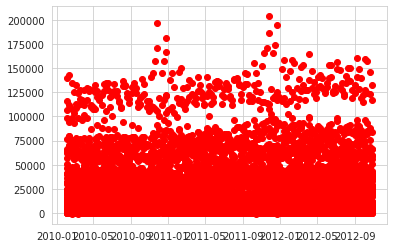

In [105]:
plt.plot(merge_df[(merge_df.Store==1)].DateTimeObj, merge_df[(merge_df.Store==1)].Weekly_Sales, 'ro')
plt.show()

In [106]:
weeklysales=merge_df.groupby(['Store','Date'])['Weekly_Sales'].apply(lambda x:np.sum(x))
weeklysales[0:5]

Store  Date      
1      2010-02-05    1643690.90
       2010-02-12    1641957.44
       2010-02-19    1611968.17
       2010-02-26    1409727.59
       2010-03-05    1554806.68
Name: Weekly_Sales, dtype: float64

In [107]:
weeklysaledept=merge_df.groupby(['Store','Dept'])['Weekly_Sales'].apply(lambda x:np.sum(x))
weeklysaledept[0:5]

Store  Dept
1      1       3219405.18
       2       6592598.93
       3       1880518.36
       4       5285874.09
       5       3468885.58
Name: Weekly_Sales, dtype: float64

In [108]:
weeklyscale=weeklysales.reset_index()
weeklyscale[0:5]

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68


In [112]:
vendorstore=pd.merge(weeklyscale, feature, on=['Store', 'Date'], how='inner')
vendorstore.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False


In [116]:
vendorstoredf =  walmartstore.iloc[:, list(range(5)) + list(range(10,13))]

In [117]:
vendorstoredf.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False


In [118]:
vendorstoredf['DateTimeObj'] = [dt.strptime(x, '%Y-%m-%d') for x in list(vendorstoredf['Date'])]
weekNo=vendorstoredf.reset_index()

In [119]:
weekNo = [(x - vendorstoredf['DateTimeObj'][0]) for x in list(vendorstoredf['DateTimeObj'])]

In [120]:
vendorstoredf['Week'] = [np.timedelta64(x, 'D').astype(int)/7 for x in weekNo]

In [121]:
vendorstoredf.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,DateTimeObj,Week
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,2010-02-05,0.0
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True,2010-02-12,1.0
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False,2010-02-19,2.0
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False,2010-02-26,3.0
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False,2010-03-05,4.0


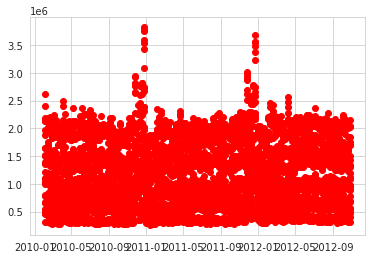

In [122]:
plt.plot(vendorstoredf.DateTimeObj, vendorstoredf.Weekly_Sales, 'ro')
plt.show()

In [123]:
vendorstoredf['IsHolidayInt'] = [int(x) for x in list(vendorstoredf.IsHoliday)]

In [124]:
vendorstoredf.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,DateTimeObj,Week,IsHolidayInt
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,2010-02-05,0.0,0
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True,2010-02-12,1.0,1
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False,2010-02-19,2.0,0
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False,2010-02-26,3.0,0
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False,2010-03-05,4.0,0


In [125]:
vendorstoredf.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [126]:
train_WM, test_WM = train_test_split(vendorstoredf, test_size=0.3,random_state=42)

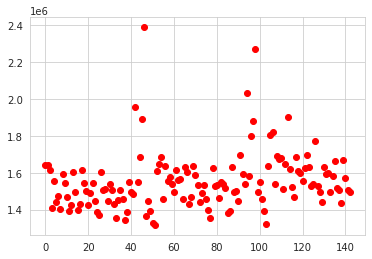

In [127]:
plt.plot(vendorstoredf[(vendorstoredf.Store==2)].Week, vendorstoredf[(vendorstoredf.Store==1)].Weekly_Sales, 'ro')
plt.show()

In [128]:
XTrain = train_WM[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'IsHolidayInt']]
YTrain = train_WM['Weekly_Sales']

In [129]:
XTest = test_WM[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'IsHolidayInt']]
YTest = test_WM['Weekly_Sales']

In [130]:
wmLinear = linear_model.LinearRegression(normalize=True)
wmLinear.fit(XTrain, YTrain)

LinearRegression(normalize=True)

In [132]:
wmLinear.coef_

array([ 2.91669548e+03, -3.28922860e+04, -4.39663500e+03, -4.97467383e+04,
       -4.16250309e+01,  1.01635838e+05])

In [133]:
#Performance on the test data sets
YHatTest = wmLinear.predict(XTest)

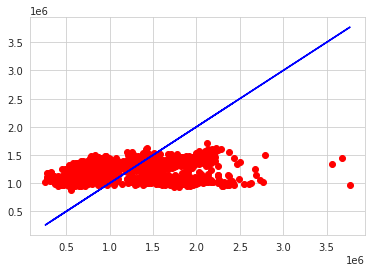

In [134]:
plt.plot(YTest, YHatTest,'ro')
plt.plot(YTest, YTest,'b-')
plt.show()

In [135]:
vendorstoredf['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [136]:
Store_Dummies = pd.get_dummies(vendorstoredf.Store, prefix='Store').iloc[:,1:]
vendorstoredf = pd.concat([vendorstoredf, Store_Dummies], axis=1)

In [137]:
vendorstoredf.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,DateTimeObj,Week,...,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,2010-02-05,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True,2010-02-12,1.0,...,0,0,0,0,0,0,0,0,0,0
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False,2010-02-19,2.0,...,0,0,0,0,0,0,0,0,0,0
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False,2010-02-26,3.0,...,0,0,0,0,0,0,0,0,0,0
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False,2010-03-05,4.0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
train_WM, test_WM = train_test_split(vendorstoredf, test_size=0.3,random_state=42)
XTrain = train_WM.iloc[:,([3,4,5,6] + [9,10]) + list(range(11,vendorstoredf.shape[1]))]
yTrain = train_WM.Weekly_Sales
                                                    
XTest = test_WM.iloc[:,([3,4,5,6] + [9,10]) + list(range(11,vendorstoredf.shape[1]))]
yTest=test_WM.Weekly_Sales

In [139]:
XTrain.head()

,Temperature,Fuel_Price,CPI,Unemployment,Week,IsHolidayInt,Store_2,Store_3,Store_4,Store_5,...,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28
1210,77.66,3.899,219.604183,6.380,66.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3676,25.55,3.523,136.753000,7.467,101.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3155,56.82,2.849,131.940807,5.435,9.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
697,87.08,3.286,222.430719,5.801,125.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1533,58.36,3.290,223.564584,6.833,103.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
wmLinear = linear_model.LinearRegression(normalize=True)
wmLinear.fit(XTrain, YTrain)

LinearRegression(normalize=True)

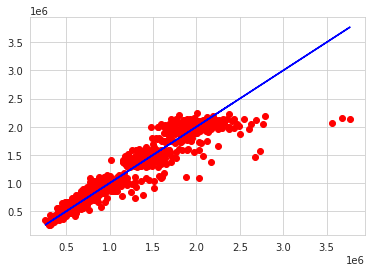

In [141]:
#Performance on the test data sets
YHatTest = wmLinear.predict(XTest)
plt.plot(YTest, YHatTest,'ro')
plt.plot(YTest, YTest,'b-')
plt.show()

In [142]:
# calculate the accuray of the model by sum of Square and mean absolute prediction error
MAPE = np.mean(abs((YTest - YHatTest)/YTest))
MSSE = np.mean(np.square(YHatTest - YTest))

print(MAPE, MSSE)

0.0881533362901866 30632601645.75352


In [143]:
from sklearn.linear_model import Lasso

In [144]:
from sklearn.metrics import mean_squared_error

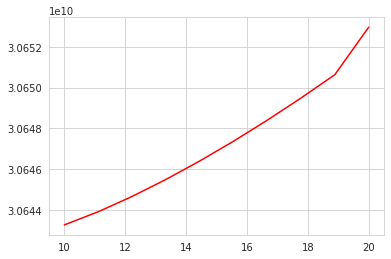

In [145]:
alphas = np.linspace(10, 20, 10)
testError = np.empty(10)

for i, alpha in enumerate(alphas) :
    
    lasso = Lasso(alpha=alpha)
    lasso.fit(XTrain, YTrain)
    testError[i] = mean_squared_error(YTest, lasso.predict(XTest))
plt.plot(alphas, testError, 'r-')
plt.show()

In [146]:
wmLinear = linear_model.LinearRegression(normalize=True)
wmLinear

LinearRegression(normalize=True)

In [147]:
lasso = Lasso(alpha=17)
lasso.fit(XTrain, YTrain)

Lasso(alpha=17)